In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
carData = pd.read_csv('Car_Model.csv')

In [3]:
carData.head()

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
Cylinders       398 non-null int64
displacement    398 non-null float64
Horsepower      398 non-null object
Weight          398 non-null int64
accelaration    398 non-null float64
ModelYear       398 non-null int64
Version         398 non-null int64
Carname         398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
carData.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [6]:
carData.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
carData['make'] = carData['Carname'].apply(lambda x : str(x).split()[0])

In [8]:
carData.make.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [9]:
carDataDropped = carData.drop(carData[carData['Horsepower'] == '?'].index)
carDataDropped['Horsepower'] = carDataDropped['Horsepower'].apply(pd.to_numeric)
carDataDropped.groupby('make').mean()

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version
make,,,,,,,,
amc,18.070370,6.444444,253.851852,114.703704,3289.740741,15.070370,74.000000,1.0
audi,26.714286,4.285714,111.857143,86.714286,2556.142857,15.942857,75.714286,2.0
bmw,23.750000,4.000000,121.000000,111.500000,2417.000000,12.650000,73.500000,2.0
buick,19.182353,6.470588,272.941176,136.411765,3553.352941,14.700000,76.117647,1.0
cadillac,19.750000,8.000000,350.000000,152.500000,4140.000000,14.750000,77.500000,1.0
capri,25.000000,4.000000,140.000000,92.000000,2572.000000,14.900000,76.000000,1.0
chevroelt,16.000000,6.000000,250.000000,105.000000,3897.000000,18.500000,75.000000,1.0
chevrolet,20.472093,6.139535,237.860465,112.930233,3276.023256,15.320930,75.511628,1.0
chevy,18.000000,6.666667,258.666667,142.333333,3717.000000,15.466667,76.000000,1.0


In [10]:
carData[carData['Horsepower'] == '?'].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [11]:
carData.loc[(carData['Horsepower'] == '?') & (carData['make'] == 'ford'), 'Horsepower'] = 112.36
carData.loc[(carData['Horsepower'] == '?') & (carData['make'] == 'renault'), 'Horsepower'] = 70
carData.loc[(carData['Horsepower'] == '?') & (carData['make'] == 'amc'), 'Horsepower'] = 114.70

In [12]:
carData['Horsepower'] = carData['Horsepower'].apply(pd.to_numeric)

In [13]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
Cylinders       398 non-null int64
displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null int64
accelaration    398 non-null float64
ModelYear       398 non-null int64
Version         398 non-null int64
Carname         398 non-null object
make            398 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [14]:
carData.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname,make
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,37
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,ford
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,51
mean,23.514573,5.454774,193.425879,104.381357,2970.424623,15.568090,76.010050,1.572864,NaN,NaN
std,7.815984,1.701004,104.269838,38.286941,846.841774,2.757689,3.697627,0.802055,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,94.500000,2803.500000,15.500000,76.000000,1.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,NaN


In [15]:
carData = carData.drop('Carname', axis=1)
y = carData.pop('mpg')

In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [17]:
carData.dtypes[carData.dtypes == "object"].index

Index(['make'], dtype='object')

In [18]:
carData.dtypes[carData.dtypes != "object"].index

Index(['Cylinders', 'displacement', 'Horsepower', 'Weight', 'accelaration',
       'ModelYear', 'Version'],
      dtype='object')

In [19]:
numeric_variables = list(carData.dtypes[carData.dtypes != "object"].index)
carData[numeric_variables].head()

,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [20]:
carData_scaled = StandardScaler().fit_transform(carData[numeric_variables])
pd.DataFrame(carData_scaled).head()

,0,1,2,3,4,5,6
0,1.498191,1.090604,0.669964,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.585265,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.192993,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.192993,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931479,0.565841,-1.840117,-1.627426,-0.715145


In [21]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=40)

model.fit(carData_scaled, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=True, random_state=40, verbose=0,
                      warm_start=False)

In [22]:
y_predictions = model.oob_prediction_
y_predictions[:10]

array([16.02286501, 14.51020408, 15.5052356 , 16.8767313 , 16.99073569,
       13.84432718, 13.95634921, 14.3916185 , 12.48533724, 14.23505435])

In [23]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

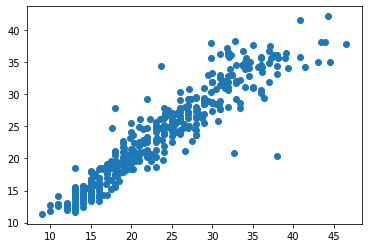

In [24]:
plt.scatter(y, y_predictions)

In [25]:
print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
print('MSE: ', metrics.mean_squared_error(y, y_predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
rSqrd = metrics.r2_score(y, y_predictions)
print('R2: ', rSqrd)
adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
print('Adj R2: ', adjRSqrd)

MAE:  1.8625701356357207
MSE:  7.293944187278738
RMSE:  2.7007303062836057
R2:  0.8803017935458574
Adj R2:  0.8781533641992445


In [26]:
carData.dtypes[carData.dtypes == "object"].index
carData.make.isna().sum()

0

In [27]:
dummies = pd.get_dummies(carData['make'], prefix='make')
carData = pd.concat([carData, dummies], axis=1)
carData.drop(['make'], axis=1, inplace=True)

In [28]:
carData.head()

,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,make_amc,make_audi,make_bmw,...,make_renault,make_saab,make_subaru,make_toyota,make_toyouta,make_triumph,make_vokswagen,make_volkswagen,make_volvo,make_vw
0,8,307.0,130.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150.0,3433,12.0,70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
numeric_variables = list(carData.dtypes[carData.dtypes != "object"].index)
numeric_variables[:10]

['Cylinders',
 'displacement',
 'Horsepower',
 'Weight',
 'accelaration',
 'ModelYear',
 'Version',
 'make_amc',
 'make_audi',
 'make_bmw']

In [30]:
scaled_x = StandardScaler().fit_transform(carData[numeric_variables])
pd.DataFrame(scaled_x).head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.498191,1.090604,0.669964,0.630870,-1.295498,-1.627426,-0.715145,-0.275092,-0.133801,-0.071067,...,-0.112795,-0.100759,-0.100759,-0.25889,-0.050189,-0.050189,-0.050189,-0.1979,-0.123718,-0.123718
1,1.498191,1.503514,1.585265,0.854333,-1.477038,-1.627426,-0.715145,-0.275092,-0.133801,-0.071067,...,-0.112795,-0.100759,-0.100759,-0.25889,-0.050189,-0.050189,-0.050189,-0.1979,-0.123718,-0.123718
2,1.498191,1.196232,1.192993,0.550470,-1.658577,-1.627426,-0.715145,-0.275092,-0.133801,-0.071067,...,-0.112795,-0.100759,-0.100759,-0.25889,-0.050189,-0.050189,-0.050189,-0.1979,-0.123718,-0.123718
3,1.498191,1.061796,1.192993,0.546923,-1.295498,-1.627426,-0.715145,3.635146,-0.133801,-0.071067,...,-0.112795,-0.100759,-0.100759,-0.25889,-0.050189,-0.050189,-0.050189,-0.1979,-0.123718,-0.123718
4,1.498191,1.042591,0.931479,0.565841,-1.840117,-1.627426,-0.715145,-0.275092,-0.133801,-0.071067,...,-0.112795,-0.100759,-0.100759,-0.25889,-0.050189,-0.050189,-0.050189,-0.1979,-0.123718,-0.123718


In [31]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=40)
model.fit(scaled_x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=40, verbose=0,
                      warm_start=False)

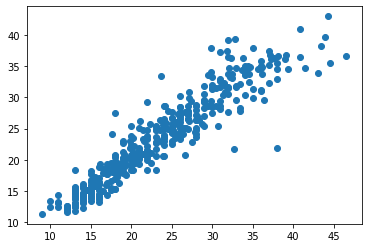

In [32]:
y_predictions = model.oob_prediction_
plt.scatter(y, y_predictions)

In [33]:
print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
print('MSE: ', metrics.mean_squared_error(y, y_predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
rSqrd = metrics.r2_score(y, y_predictions)
print('R2: ', rSqrd)
adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
print('Adj R2: ', adjRSqrd)

MAE:  1.8727807872810702
MSE:  7.2144634669522825
RMSE:  2.685975328805587
R2:  0.8816061220993103
Adj R2:  0.8794811037780159


## Feature Importance

In [34]:
feature_importance = pd.Series(model.feature_importances_, index=carData.columns)
feature_importance

Cylinders             1.939313e-01
displacement          3.667191e-01
Horsepower            1.204719e-01
Weight                1.569573e-01
accelaration          2.212505e-02
ModelYear             1.140400e-01
Version               5.300815e-03
make_amc              3.563258e-04
make_audi             4.710716e-04
make_bmw              5.926981e-05
make_buick            2.412064e-04
make_cadillac         3.476281e-04
make_capri            6.457924e-07
make_chevroelt        3.685787e-06
make_chevrolet        7.856775e-04
make_chevy            3.025995e-04
make_chrysler         1.247661e-04
make_datsun           2.014661e-03
make_dodge            5.544091e-04
make_fiat             4.997233e-04
make_ford             8.753584e-04
make_hi               2.881859e-05
make_honda            3.055256e-04
make_maxda            8.070867e-04
make_mazda            1.450427e-03
make_mercedes         3.602468e-05
make_mercedes-benz    1.872197e-05
make_mercury          3.507262e-04
make_nissan         

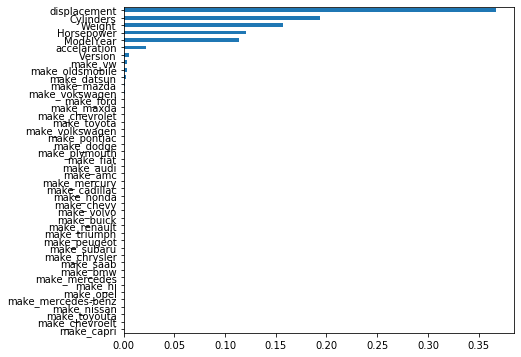

In [35]:
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh', figsize=(7,6))

## Parameter Optimization

In [36]:
results = []
n_estimator_values = [100, 500, 1000, 2000, 3000]

for n_estimator_value in n_estimator_values:
    model = RandomForestRegressor(n_estimators=n_estimator_value, oob_score=True, random_state=40)
    model.fit(scaled_x, y)
    y_predictions = model.oob_prediction_
    print('Trees....', n_estimator_value)
    print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
    print('MSE: ', metrics.mean_squared_error(y, y_predictions))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
    rSqrd = metrics.r2_score(y, y_predictions)
    print('R2: ', rSqrd)
    adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
    print('Adj R2: ', adjRSqrd)
    print()

Trees.... 100
MAE:  1.8727807872810702
MSE:  7.2144634669522825
RMSE:  2.685975328805587
R2:  0.8816061220993103
Adj R2:  0.8794811037780159

Trees.... 500
MAE:  1.842073346562254
MSE:  7.114141680926035
RMSE:  2.66723483797847
R2:  0.8832524656340692
Adj R2:  0.8811569970685269

Trees.... 1000
MAE:  1.8532473865974366
MSE:  7.192384977238913
RMSE:  2.6818622218971115
R2:  0.8819684439860772
Adj R2:  0.879849928878135

Trees.... 2000
MAE:  1.8672367641903898
MSE:  7.269032853846125
RMSE:  2.6961143992505447
R2:  0.8807106041777601
Adj R2:  0.8785695124578738

Trees.... 3000
MAE:  1.8723559243555563
MSE:  7.307755814178207
RMSE:  2.703286114006101
R2:  0.8800751360714332
Adj R2:  0.877922638513741



All seems to be similar, but still 500 can be used

In [37]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_feature_value in max_features_options:
    model = RandomForestRegressor(n_estimators=500, oob_score=True, max_features=max_feature_value, random_state=40)
    model.fit(scaled_x, y)
    y_predictions = model.oob_prediction_
    print('Feature....', max_feature_value)
    print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
    print('MSE: ', metrics.mean_squared_error(y, y_predictions))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
    rSqrd = metrics.r2_score(y, y_predictions)
    print('R2: ', rSqrd)
    adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
    print('Adj R2: ', adjRSqrd)
    print()

Feature.... auto
MAE:  1.842073346562254
MSE:  7.114141680926035
RMSE:  2.66723483797847
R2:  0.8832524656340692
Adj R2:  0.8811569970685269

Feature.... None
MAE:  1.842073346562254
MSE:  7.114141680926035
RMSE:  2.66723483797847
R2:  0.8832524656340692
Adj R2:  0.8811569970685269

Feature.... sqrt
MAE:  1.937607722258971
MSE:  7.608205068734722
RMSE:  2.758297494603278
R2:  0.8751445750501928
Adj R2:  0.8729035802434014

Feature.... log2
MAE:  1.957713086904585
MSE:  7.747146427443324
RMSE:  2.7833696174678857
R2:  0.8728644600653911
Adj R2:  0.8705825401178469

Feature.... 0.9
MAE:  1.8505286533928798
MSE:  7.083745714683201
RMSE:  2.6615307089498708
R2:  0.8837512825360485
Adj R2:  0.8816647670943878

Feature.... 0.2
MAE:  1.914781874070205
MSE:  7.4188696665665885
RMSE:  2.7237602072441303
R2:  0.8782516879476736
Adj R2:  0.8760664618339139

Feature.... 1
MAE:  2.159109565676361
MSE:  9.323235790915396
RMSE:  3.053397417781609
R2:  0.8469998434498583
Adj R2:  0.8442536867938302



Auto and None seems have better result. Lets go with Auto

In [38]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=500, oob_score=True, max_features='auto', random_state=40, min_samples_leaf=min_samples)
    model.fit(scaled_x, y)
    y_predictions = model.oob_prediction_
    print('Min Samples....', min_samples)
    print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
    print('MSE: ', metrics.mean_squared_error(y, y_predictions))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
    rSqrd = metrics.r2_score(y, y_predictions)
    print('R2: ', rSqrd)
    adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
    print('Adj R2: ', adjRSqrd)
    print()

Min Samples.... 1
MAE:  1.842073346562254
MSE:  7.114141680926035
RMSE:  2.66723483797847
R2:  0.8832524656340692
Adj R2:  0.8811569970685269

Min Samples.... 2
MAE:  1.867269400363388
MSE:  7.240681224164262
RMSE:  2.6908513939205676
R2:  0.8811758722324418
Adj R2:  0.8790431314776395

Min Samples.... 3
MAE:  1.896744661568745
MSE:  7.435959350403823
RMSE:  2.7268955517958187
R2:  0.8779712354994972
Adj R2:  0.8757809756238472

Min Samples.... 4
MAE:  1.9061149156927302
MSE:  7.504816717945339
RMSE:  2.7394920547330193
R2:  0.8768412428392506
Adj R2:  0.8746307010440577

Min Samples.... 5
MAE:  1.9277356031994282
MSE:  7.638518747274538
RMSE:  2.7637870300141683
R2:  0.8746471085411165
Adj R2:  0.8723971848482648

Min Samples.... 6
MAE:  1.9472372884968945
MSE:  7.706513644240095
RMSE:  2.7760608142186105
R2:  0.873531269564859
Adj R2:  0.8712613179929463

Min Samples.... 7
MAE:  1.9645231364028086
MSE:  7.793117456326151
RMSE:  2.7916155638493905
R2:  0.8721100466006264
Adj R2:  0.86

Will go with 2

In [39]:
# Final Model
model = RandomForestRegressor(n_estimators=500, oob_score=True, max_features='auto', random_state=40, min_samples_leaf=2)
model.fit(scaled_x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=40, verbose=0,
                      warm_start=False)

In [40]:
y_predictions = model.oob_prediction_
print('MAE: ', metrics.mean_absolute_error(y, y_predictions))
print('MSE: ', metrics.mean_squared_error(y, y_predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predictions)))
rSqrd = metrics.r2_score(y, y_predictions)
print('R2: ', rSqrd)
adjRSqrd = 1-(((1-rSqrd) * (len(carData_scaled)-1))/(len(carData_scaled)-carData_scaled.shape[1]-1))
print('Adj R2: ', adjRSqrd)
print()

MAE:  1.867269400363388
MSE:  7.240681224164262
RMSE:  2.6908513939205676
R2:  0.8811758722324418
Adj R2:  0.8790431314776395



In [41]:
print(carData[0:1])
print(y[0:1])

   Cylinders  displacement  Horsepower  Weight  accelaration  ModelYear  \
0          8         307.0       130.0    3504          12.0         70   

   Version  make_amc  make_audi  make_bmw  ...  make_renault  make_saab  \
0        1         0          0         0  ...             0          0   

   make_subaru  make_toyota  make_toyouta  make_triumph  make_vokswagen  \
0            0            0             0             0               0   

   make_volkswagen  make_volvo  make_vw  
0                0           0        0  

[1 rows x 44 columns]
0    18.0
Name: mpg, dtype: float64


In [42]:
model.predict(carData[0:1])[0]

16.008877460317443